     nodes  interval  blocksize   SBR
53       1        20     535000  0.00
67       1       100     535000  0.00
59       1       400     535000  0.00
48       1       800     535000  0.00
37       1      1000     535000  0.00
107      1      2000     535000  0.00
44       1      3000     535000  0.00
17       1      4000     535000  0.00
83       1      5000     535000  0.00
8        1      6000     535000  0.00
5        1      7000     535000  0.00
47       1      8000     535000  0.00
104      1      9000     535000  0.00
24       1     10000     535000  0.00
90       2        20     535000  0.07
80       2       100     535000  0.31
9        2       400     535000  0.92
2        2       800     535000  0.41
19       2      1000     535000  0.38
57       2      2000     535000  0.26
23       2      3000     535000  0.18
101      2      4000     535000  0.17
55       2      5000     535000  0.12
72       2      6000     535000  0.11
26       2      7000     535000  0.09
81       2  

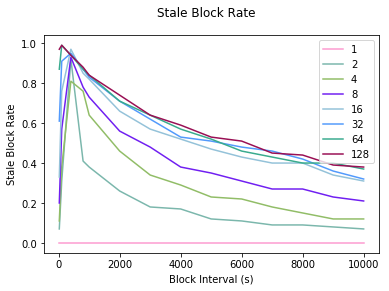

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os

DATA = "./data/data.csv"
df = pd.read_csv(DATA)
df = df.sort_values(['nodes', 'interval'])
print(df)

netsizes = list(df["nodes"].unique())
#repeats = df["Run Index"].unique()
repeats = [1]
number_of_colors = len(netsizes)

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

# plot Stale Block Rate
fig, ax = plt.subplots()
fig.suptitle("Stale Block Rate")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['nodes'] == size]
        subset.plot(x="interval", y="SBR", ax=ax, label=str(size), color=color)
ax.set(xlabel="Block Interval (s)", ylabel="Stale Block Rate")

#fig = ax.get_figure()
#fig.savefig("/Users/amiecorso/Desktop/exp1-" + str(netsize) + ".pdf")

plt.show()
